# Geospatial Data in Python with GeoPandas 

### Content derived from UC Berkeley's D-Lab and Serge Rey's .ipynbs and tutorials


##### https://pad.carpentries.org/ER131Lab06



## Introduction

The goal of this notebook is to give you a very broad overview and intro on how to work with geospatial data in Python using the **geopandas** package.

> ### Assumptions

> This tutorial assumes you have basic working knowledge of Python and (now) of geospatial data. 
 



## Outline
1.	Importing files
2.	GeoDataFrame explore
3.	GeoSeries
4.	Geometries (Points, Linestrings, Polygons)
5.	CRS
6.	Plotting multiple layers
7.	Spatial relationships and operations
8.	Spatial join
9.	Example: Census + GIS
10.	Plotting: Binning data
11.	Spatial subsetting


 
## GeoPandas and related Geospatial Packages

[GeoPandas](http://geopandas.org/) is a relatively new package that makes it easier to work with geospatial data in Python. In the last few years it has grown more powerful and stable. This really is great because previously it was quite complex to work with geospatial data in Python.  GeoPandas is now the go to package for working with geospatial data. 

`GeoPandas` provides convenient, unified access to the functionality of the [pandas](https://pandas.pydata.org/) package , extending it with the geospatial processing capabilities provided by a number of lower level spatial data packages including [shapely](https://pypi.python.org/pypi/Shapely) for geometry processing, [fiona](https://pypi.python.org/pypi/Fiona) and [GDAL/Ogr](https://gdal.org) for spatial data file IO and[ pyproj](https://github.com/jswhit/pyproj) and [PROJ.4](https://github.com/OSGeo/proj.4/wiki) for map projections and coordinate systems.  


We will also use a few other optional geospatial libraries that are  commonly used with geopandas, including:

- **rtree** for spatial indexing to improve performance
- **geopy** for geocoding and for geodesic distance calculations
- **pysal** for spatial analysis functions such as data classification methods.
- **descartes** for ploting Shapelygeometric objects with Matplotlib.


Finally, we will use a number of standard Python libraries including pandas, numpy, and matplotlib.

## Install Geopandas and dependencies

>**IMPORTANT** -  if you are installing these Python packages on your local computer see [Geopandas documentation ](http://geopandas.org/install.html) . Do not use the code below

In [ ]:
# Install pysal
!pip install pysal
# Install mapclassify
!pip install mapclassify
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from geopandas.tools import overlay
pd.options.display.max_rows = 10

## 1.- Importing geospatial data

Geospatial data can be found from different formats and sources like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, among others.

GeoPandas makes it easy to read in almost any kind of vector data file including the ESRI Shapefile with the read_file command. You simply put the name of the file in quotes and assign the resulting object to a simple yet informative variable name.

The GeoPandas library uses the `fiona` library under the hood, using the `geopandas.read_file` function to read different GIS file formats.


#### Let's start by reading a shapefile with all the countries of the world

Fetch the data with **!wget** command

In [ ]:
!wget https://www.dropbox.com/s/eu2acphgoivj7y7/world_countries.zip

In [ ]:
countries = gpd.read_file("zip://./world_countries.zip")
# if the archive is already in .shp format
# countries = gpd.read_file("./world_countries.shp")

# If geopandas can't read the zipped shapefile, unzip and then read it in directly
# !unzip ./file.zip
# var_name = gpd.read_file("./extracted_file.shp")

In [ ]:
type(countries)

Explore the data

In [ ]:
# Your Code Here

See the column 'geometry'?

We used the GeoPandas library to read in the geospatial data, and this returned us a `GeoDataFrame`

## 2.- GeoDataFrame

A GeoDataFrame contains a tabular, geospatial dataset:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* A `.geometry` attribute that always returns the column with the geometry information (returning a GeoSeries). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* It has some extra methods for working with spatial data (area, distance, buffer, intersection, ...), which we will see in later notebooks

Because it is a pandas dataframe you can use all the pandas data frame methods with it

In [ ]:
countries.pop_est.sum()/1e3

Plot the countries

In [ ]:
# Your Code Here

You can always access the geometry column with the .geometry attribute and this gives us a GeoSeries

## 3.- GeoSeries

The **geometry** column is of type GeoSeries, taking its name and its base functionality from the pandas series object. It has additional methods and attributes specific for geospatial data

In [ ]:
countries.geometry

What type of data is the column "geometry"?

In [ ]:
# Answer

Seen differently, through the geom_type

In [ ]:
# Answer

Different properties can be explored.
For example, **area**

In [ ]:
countries.geometry.area

The GeoSeries extends this with the attributes and methods from the [Shapely](https://shapely.readthedocs.io) geometry library. 

One can filter: boolean, or directly for a matched query


#### Exercise

Let's take a look at the geometry a bit more closely by considering the row for a given country, say, Argentina.

1- Extract the 'geometry' data corresponding to Argentina
2- What type of data is it?
3- Plot the country
4- What is the country's area? (NOTE: We'll get to CRS later on)

In [ ]:
# Answer 1

In [ ]:
# Answer 2

In [ ]:
# Answer 3

Pretty cool to be able to make a map with a single command. However, there is always room for improvement. You can find out more about the plotting options for basic maps in the geopandas documentation and in the matplotlib documentation.

We can use some options to make a prettier map. Take a minute to consider what each option does.

In [ ]:
# Fill in correctly with this ending:
# (linewidth=0.25, edgecolor='black', facecolor='pink',  figsize=(14,10), )

In [ ]:
# Answer 4

This works at continent scale, too

In [ ]:
# Example for continent
# Example for South America
# Example for North America

# ========================

Q1- What is the total area of the world? (ignore the units for now)



Q2- What are the 5 largest countries in the world by area? (do not change projection)


# ========================

### Calculating Length or Perimeter

Similarly we can calculate the perimeter of our country polygons, for example, Canada

In [ ]:
namerica[namerica['name'] == 'Canada'].length

Or summing all perimeters in NorthAmerica

In [ ]:
namerica.length.sum()

### Calculating Distance
We can also compute the shortest distance between individual geometries.

In [ ]:
namerica[namerica['name']=='Canada'].geometry.squeeze().distance(namerica[namerica['name']=='United States of America'].geometry.squeeze())

When working in geopandas, you have attributes and methods for **geodataframes**, **geoseries** and **geometry** objects.

You can use the "dot-tab" command to what is available for each type of  geospatial object. This is a great way to explore the data, when used along with the help page and the GeoPandas online documentation.

Uncomment the rows below to give it a try.

In [ ]:
# Uncomment each of the lines below, one at a time. 
# Then press tab after the dot to see available methods and attributes

## for a geometry
#x = countries.geometry[14]
#x

## for a geoseries
#countries.geometry

## for a geodataframe
#countries

## Challenge

Let's take a few minutes to practice some of what we have done so far with a different data set.

- Download via: !wget https://www.dropbox.com/s/iwle9zatyl4exp8/us_states.zip
- Read the file **us_states.zip** into a geopandas dataframe named **state_boundaries**.
- Take a look at the data in this dataframe using `head`.
- Then, make a map of the `usa_test`, 
    - setting the `figsize` to (14,10)
    - the fill color to green,
    - and the outline color to white

In [ ]:
# your code here to load the data from the zip file into a geodataframe


## 4.- Geometries: Points, Linestrings and Polygons


A GeoPandas GeoSeries supports three basic types of vector geometries, in [Well-Known Text ](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry) format:
- **Points / MultiPoints**
    - POINT( -122 38)

    - MULTIPOINT((-122 38), (-123 39))
    
    
- **Lines / MultiLines***
    - LINE (30 10, 10 30, 40 40)
    
    - MULTILINE((10 10, 20 20, 10 40),(40 40, 30 30, 40 20, 30 10))
    
    
- **Polygons / MultiPolygons**
    - POLYGON ((35 10, 45 45, 15 40, 10 20, 35 10), (20 30, 35 35, 30 20, 20 30))
    - MULTIPOLYGON (((30 20, 45 40, 10 40, 30 20)), ((15 5, 40 10, 10 20, 5 10, 15 5)))

Notes:
- GeoPandas does not support raster geometries - check out the [Rasterio](https://rasterio.readthedocs.io/en/latest/) package for that.
- A GeoSeries can contain mixed geometry types but it's not a great idea.

(See https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects for extensive overview)


</br>



In [ ]:
set(countries.geom_type) #set returns unique values

Exploring the indvidual geometry objects so far analyzed, they are all Polygons/Multipolygons

Exploring further individual geometry obejects 

In [ ]:
countries.geometry[4]

In [ ]:
countries.geometry[4].area

In [ ]:
type(countries.geometry[4])

In [ ]:
print(countries.geometry[4])

Geopandas spatial attributes and methods apply to the special geometry column, even if you do not explicitly reference it.

For example, the code in both of the following cells will return the minimum bounding coordinates that contain all geometries in the GeoSeries.

In [ ]:
countries.plot()

In [ ]:
countries.total_bounds

In [ ]:
countries.geometry.total_bounds

### Let's look at other types of geometries

#### POINTS

Let's use a data set from cities around the world, consisting of Point data

In [ ]:
!wget https://www.dropbox.com/s/0zcqmcb7x4y5wq5/cities.zip

In [ ]:
# Read as "cities"

In [ ]:
cities

In [ ]:
set(cities.geom_type)

In [ ]:
print(cities.geometry[0])

In [ ]:
cities.geometry[0]

In [ ]:
cities.plot()

#### LINES

In [ ]:
!wget https://www.dropbox.com/s/76nb1xkkyclqhz0/rivers.zip

In [ ]:
# Read as "rivers"

In [ ]:
rivers

In [ ]:
print(rivers.geometry[0])

In [ ]:
rivers.geometry[0]

In [ ]:
type(rivers.geometry[0])

In [ ]:
rivers.geometry[0].length

In [ ]:
rivers.crs

In [ ]:
rivers.plot()

In [ ]:
rivers.geometry[0].distance(rivers.geometry[1])

#### shapely library


Say you were missing a city in your list, or you wanted to add something to the geospatial data you've already downloaded/collected. Can you add more 'manually'? The answer is yes.

Simgle geometries are represented by **shapely** objects.

In [ ]:
from shapely.geometry import Point, Polygon, LineString

In [ ]:
p = Point(1, 1)

In [ ]:
print(p)

In [ ]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

In [ ]:
print(polygon)

# ========================

Q3.- You found a csv file with a list of 500 locations across the world and you need to plot them to see where they fall. These have an id, Latitude, and Longitude.
Source: https://www.dropbox.com/s/ww4hyhkzwqjnoqz/random_locations_worldwide.csv

Task: Plot these points 

Hints: 
(1) Use same crs as the "cities" shapefile.
(2) You can use list comprehension
(3) Name your geometry column "geometry" such that your final GeoDataFrame can be shown as:
cities_500 = gpd.GeoDataFrame(nameOfYourProcessedCSVdataFrame, geometry='geometry')

# ========================

## 5.- Coordinate reference systems

A **coordinate reference system (CRS)** determines how the two-dimensional (planar) coordinates of the geometry objects should be related to actual places on the (non-planar) earth.

For a nice in-depth explanation, see https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

NOTE: The output of spatial measurements depend on the CRS and is expressed in the units of the CRS. The Shapely library assumes a two dimensional planar coordinate system and makes no transformation on the data - that is left for the analyst.



In order to reduce distortion in maps we apply a map projection (math) to transform 3D geographic coordinates to 2D projected map coordinates.
<img src="https://www.e-education.psu.edu/natureofgeoinfo/sites/www.e-education.psu.edu.natureofgeoinfo/files/image/projection.gif"></img>


CRS transformations are often necessary for geopandas geometric operations like area and distance calculations which assume a 2D plane.

## Defining and Transforming a CRS
The process for transforming a CRS is:

1. Make sure a **crs** is defined for the geopandas dataframe by checking the **crs** property. 
2. If it is not set, you can **define** it.
3. Transform the coordinate geometry to a new CRS using the **to_crs** method.
- This returns a new geodataframe with the new coordinate values and CRS.
- You need to know what CRS to use!!

A GeoDataFrame or GeoSeries has a `.crs` attribute which holds (optionally) a description of the coordinate reference system of the geometries:

In [ ]:
countries.plot()

Can you comment on the axes?

In [ ]:
countries.crs

What's an **epsg:4326**?  That's an [EPSG](http://www.epsg.org/) code for the geographic CRS known as the [World Geodectic System of 1984](https://en.wikipedia.org/wiki/World_Geodetic_System#WGS84), or `WGS84`. This is the most commonly used CRS for latitude and longitude coordinate data and is the default CRS for most mapping software when the data does not have a defined CRS.

We can make our map look better by transforming it to a 2D projected `CRS`. A projected CRS applies a mathematical transformation to the data based on a [map projection](https://en.wikipedia.org/wiki/Map_projection)

Common map projections for USA data and their EPSG codes include:

- **Web Mercator** (epsg:3857) (Pseudo/Spherical Mercator)
- **USA Contiguious Albers** (epsg:7603)


The `.crs` attribute is given as a dictionary. In this case, it only indicates the EPSG code, but it can also contain the full "proj4" string (in dictionary form). 

Under the hood, GeoPandas uses the `pyproj` / `proj4` libraries to deal with the re-projections.

_For more information, see also http://geopandas.readthedocs.io/en/latest/projections.html._

### Determinining the Best CRS

It's not obvious or easy to find the best CRS for your spatial analysis. It really depends on what you are trying to measure (area, distance, direction, shape) and the location of your study area. There is a theoretically unlimited number of CRSs to choose from.

However, only a few are typically used in any one area and you figure this out by reviewing the literature of geospatial analysis in your field and geographic methods and tools in general.


For example, the UTM coordinate system is good for regional area, distance and direaction calculations. The system includes a number of different CRSs - one for 60 different zones in the two hempisphers.  UTM sone 10 north and 11 north are often used for the geospatial analysis California data.  UTM zone 10N (epsg=32610) also includes most of Oregon & Washington.

---

Also, remember the link

https://projectionwizard.org/#

This can be useful to extract closer projections to the area of interest

---

There are sometimes good reasons you want to change the coordinate references system of your dataset, for example:

- different sources with different crs -> need to convert to the same crs
- distance-based operations -> if you a crs that has meter units (not degrees)
- plotting in a certain crs (eg to preserve area)

We can convert a GeoDataFrame to another reference system using the `to_crs` function. 

For example, let's convert the countries to the World Mercator projection (http://epsg.io/3395):

In [ ]:
# remove Antartica, as the World Mercator projection cannot deal with the poles
countries = countries[(countries['name'] != "Antarctica")]

In [ ]:
countries_mercator = countries.to_crs(epsg=3857)  # or .to_crs({'init': 'epsg:3395'})

In [ ]:
countries_mercator

In [ ]:
countries_mercator.plot()

# ========================

Q4.- Repeat Qs 1 and Q2 but with the Mercator projection. Do results change? How much?

Q5.- Is this true for countries North, South, at the Equator?

# ========================

### Let's try different measurements with the Continental US.

First, let's transform the CRS of the **conus** geodataframe to Web Mercator. The **to_crs** method will return a new geododataframe.

In [ ]:
conus= state_boundaries.cx[-130:-50, 20:50].reset_index(drop=True)
#Don't worry about the .cx command for now. We'll come back to it
conus

In [ ]:
# Transform geographic crs to web mercator - 3857
conus_3857 = conus.to_crs(epsg=3857)
conus_3857.plot()

## Challenge

Now you try it! Transform the **conus** geodataframe to one that uses the **USA Contiguous Albers CRS** (7603).

Then, display the output geodataframe.

In [ ]:
# Answer here
conus_7603.plot()

## 6.- Plotting different layers together: Rivers, Cities, Countries

First, we plot the different projections we just talked about

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(18,4), subplot_kw=dict(aspect='equal'))
# Don't show the coordinate axis
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
# Show a title
ax[0].set_title('Geographic, unprojected (4326)')
ax[1].set_title('Web Mercator (3857)')
ax[2].set_title('Albers EA (7603)')
# display
conus.plot(ax=ax[0])
conus_3857.plot(ax=ax[1])
conus_7603.plot(ax=ax[2])
plt.show()

Now, we can go back to the other data set for Rivers, Cities, and COuntries

In [ ]:
#Note this is not on mercator
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax, color='blue')
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

We can play with things a little bit

In [ ]:
base = countries.plot(color='white', edgecolor='black',  figsize=(14,10))
rivers.plot(ax=base)
countries.centroid.plot(ax=base, color="red")  

In [ ]:
# Mapping with advanced matplotlib settings

fig, ax = plt.subplots(1, figsize=(14,10))  # Initialize the plot figure (drawing area) and axes (data area)
ax.set_aspect('equal')   # set the aspect ratio for the x and y axes to be equal. 
                         # This is done automatically in gdf.plot()
    
base = countries.plot(ax=ax, color='black')  # Set the base map, or bottom map layer
rivers.plot(ax=base, color='white', edgecolor="black")  # draw the data with the base
_ = ax.axis('off') # Don't show the x, y axes and labels in the plot
ax.set_title("Different way of showing rivers")  # Give the plot a title
plt.show()

In [ ]:
# Now focusing on another layer

fig, ax = plt.subplots(1, figsize=(14,10))  # Initialize the plot figure (drawing area) and axes (data area)
ax.set_aspect('equal')   # set the aspect ratio for the x and y axes to be equal. 
                         # This is done automatically in gdf.plot()
    
base = countries.plot(ax=ax, color='black')  # Set the base map, or bottom map layer
cities.plot(ax=base, color='yellow', edgecolor="black")  # draw the data with the base
_ = ax.axis('off') # Don't show the x, y axes and labels in the plot
ax.set_title("Another way of showing cities")  # Give the plot a title
plt.show()

## 7.- Spatial relationships and operations

## Spatial relationships

An important aspect of geospatial data is that we can look at *spatial relationships*: how two spatial objects relate to each other (whether they overlap, intersect, contain, .. one another).

The topological, set-theoretic relationships in GIS are typically based on the DE-9IM model. See https://en.wikipedia.org/wiki/Spatial_relation for more information.

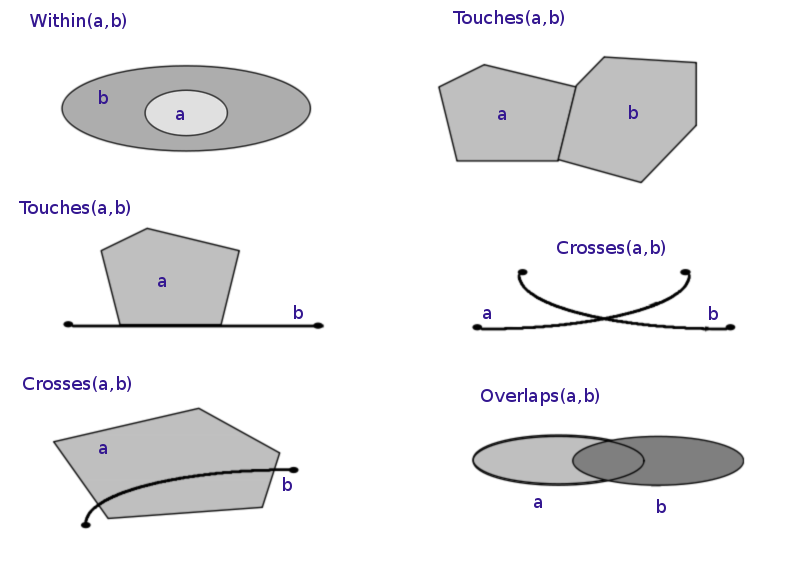
(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))

## Relationships between individual objects

Let's first create some small toy spatial objects:

A polygon <small>(note: we use `.squeeze()` here to to extract the scalar geometry object from the GeoSeries of length 1)</small>:

## _Let's focus on the US territory_

---

To get individual state county boundaries, visit https://www.census.gov/geographies/mapping-files/2018/geo/carto-boundary-file.html and download the "cb_2018_us_county_500k.zip" file.

OR

for easiness....

In [ ]:
!wget https://www.dropbox.com/s/3205f24yy4m4ugp/cb_2018_us_county_500k.zip

In [ ]:
counties = gpd.read_file("zip://./cb_2018_us_county_500k.zip")
counties.head()

In [ ]:
# Just California
cal_counties = counties[counties["STATEFP"] == "06"]
cal_counties.head()

In [ ]:
cal_counties.geometry.plot()

## Geometric Aggregrations

We often receive data that has more detail than we need. For example, we might have population by county when we want it by state. In pandas you can use a `groupby` operation to aggregate the data values.  

With geospatial data we often obtain data that has more geometric detail than we need. We can use the geopandas **dissolve** method to aggregate geometric data that share a common value.

For example, let's create a single geometry that is the outline of the state of California by dissolving the counties in the `cal_counties` geodataframe. 


We need a column value to indicate how to aggregate the geometry. We can create this column and populate it if it doesn't exist. 


In [ ]:
# create a column with a single value that we can dissolve on
cal_counties['commonDenominator'] = 'stateOfCalifornia' 
cal_counties.head()

Now we can use the **dissolve** method to merge all the values that have "stateOfCalifornia" in the commonDenominator column.

In [ ]:
# Select on the columns we weant to keep in the dissovled geodataframe
cal_outline = cal_counties[["commonDenominator","geometry"]]  

# dissolve the interior polygons
cal_outline = cal_counties.dissolve(by='commonDenominator', as_index=False)

# take a look
cal_outline.head()


In [ ]:
cal_outline.geometry.plot()

In this case, we already have a similar map without the need to dissolve

In [ ]:
# state_boundaries.head()
california = state_boundaries[state_boundaries["ABBREV"] == "CA"]
california.plot()

In [ ]:
cal_counties.plot()

### Let's evaluate spatial relationships

In [ ]:
contra_costa = cal_counties.loc[cal_counties['NAME']=='Contra Costa','geometry'].squeeze()

In [ ]:
contra_costa

In [ ]:
los_angeles = cal_counties.loc[cal_counties['NAME']=='Los Angeles','geometry'].squeeze()

In [ ]:
los_angeles

In [ ]:
OAK=contra_costa.centroid
OAK

In [ ]:
LAX=los_angeles.centroid
LAX

In [ ]:
line = LineString([OAK,LAX])
line

In [ ]:
gpd.GeoSeries([contra_costa, los_angeles, OAK, LAX, line]).plot(cmap='tab10')

### Challenge: Can you recreate this between Fresno and San Diego?

In [ ]:
OAK.within(contra_costa)

In [ ]:
contra_costa.contains(OAK)

In [ ]:
LAX.within(contra_costa)

In [ ]:
contra_costa.contains(LAX)

The line we drew from OAK to LAX is not fully located within Contra Costa, but it does intersect it:

In [ ]:
contra_costa.contains(line)

In [ ]:
line.intersects(contra_costa)

### Spatial relationships with GeoDataFrames

The same methods that are available on individual `shapely` geometries as we have seen above, are also available as methods on `GeoSeries` / `GeoDataFrame` objects.

For example, if we call the `contains` method on the world dataset with the `OAK` point, it will do this spatial check for each country in the `world` dataframe:

In [ ]:
countries.contains(OAK)

Because the above gives us a boolean result, we can use that to filter the dataframe:

In [ ]:
countries[countries.contains(OAK)]


Another example, extracting the linestring of the Amazon river in South America, we can query through which countries the river flows:

In [ ]:
rivers

In [ ]:
nile=rivers[rivers['name'] == 'Nile'].geometry.squeeze()


In [ ]:
countries[countries.crosses(nile)]

In [ ]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()

In [ ]:
countries[countries.crosses(amazon)]  # or .intersects

#### Spatial relationships functions overview

<ul>
  <li>`equals`</li>
  <li>`contains`</li>
  <li>`crosses`</li>
  <li>`disjoint`</li>
  <li>`intersects`</li>
  <li>`overlaps`</li>
  <li>`touches`</li>
  <li>`within`</li>
  <li>`covers`</li>
</ul>

<p>
See https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships for an overview of those methods.
<p></p>
See https://en.wikipedia.org/wiki/DE-9IM for all details on the semantics of those operations.
</p>
</div>

<div class="alert alert-info" style="font-size:120%">
<b>BEYOND THIS EXAMPLE</b>: <br><br>
In this article (https://towardsdatascience.com/spatial-data-geopandas-and-pok%C3%A9mon-part-i-8525c801ed18), a map of solar radiation is used vs. a map of the US with the "within" command to appropriate solar insolation values to a given county.

Check it out! 


## Spatial operations

Next to the spatial predicates that return boolean values, Shapely and GeoPandas aslo provide analysis methods that return new geometric objects.

See https://shapely.readthedocs.io/en/stable/manual.html#spatial-analysis-methods for more details.

### --> Buffers

In [ ]:
gpd.GeoSeries([contra_costa, OAK.buffer(.25)]).plot(alpha=0.5, cmap='tab10')

and now take the intersection, union or difference of those two polygons:

In [ ]:
OAK.buffer(.25).intersection(contra_costa)

In [ ]:
OAK.buffer(.25).union(contra_costa)

In [ ]:
OAK.buffer(.25).difference(contra_costa)

To have the buffer in a specific crs, since it's a Polygon, it needs to be changed to a Geopandas object (GeoDataFrame or GeoSeries) first

gpd.GeoSeries(OAK.buffer(0.25), crs=

In [ ]:
gpd.GeoSeries(OAK.buffer(0.25), crs=cal_counties.crs).to_crs(epsg=3310).plot()

# ========================

Q5- How many cities are in Europe (according to the data set of "cities")?

_Your code here_

Q6- What is the distance between the centroids of Imperial and Shasta? (Justify your CRS)

_Your code here_

Q7- Create a buffer over the rivers shapefile. Discuss: What type of research problems can this routine (applying a buffer to a LineString) be helpful with?


# ========================

## 8.- Spatial join operation


SPATIAL JOIN = *transferring attributes from one layer to another based on their spatial relationship* 


Different parts of this operations:

<ul>
  <li>The GeoDataFrame to which we want add information</li>
  <li>The GeoDataFrame that contains the information we want to add </li>
  <li>The spatial relationship we want to use to match both datasets ('intersects', 'contains', 'within')</li>
  <li>The type of join: left or inner join</li>
</ul>

</div>

In this case, we want to join the US `counties` dataframe with the information of the `states` dataframe, based on the spatial relationship between both datasets.

We use the [`geopandas.sjoin`](http://geopandas.readthedocs.io/en/latest/reference/geopandas.sjoin.html) function:

In [ ]:
# We use the previously downloaded states info "state_boundaries"

In [ ]:
# !wget https://www.dropbox.com/s/iwle9zatyl4exp8/us_states.zip
# state_boundaries = gpd.read_file('zip://./us_states.zip')

In [ ]:
state_boundaries

In [ ]:
counties

In [ ]:
joined = gpd.sjoin(counties, state_boundaries, op='within', how='left')
joined

In [ ]:
# Uncomment below to know more about the sjoin operation
#gpd.sjoin?

In [ ]:
counties.crs, state_boundaries.crs

In [ ]:
## NOTE: The following command took quite some memory (?)
# counties.to_crs(epsg=4326) 

## The overlay operation

In the spatial join operation above, we are not changing the geometries itself. We are not joining geometries, but joining attributes based on a spatial relationship between the geometries. This also means that the geometries need to at least overlap partially.

If you want to create new geometries based on joining (combining) geometries of different dataframes into one new dataframe (eg by taking the intersection of the geometries), you want an **overlay** operation.

_gpd.overlay(subSelectedGroup, bufferedLayer, how='difference').plot()_

## 9.-Merging Datasets (Census + GIS) and Plotting


#### American Fact Finder

Go to [American Fact Finder](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml) to get information about these counties.

    1. Type California In the "Community Facts" search bar and click "GO"
    2. Under 2010 Census, click "Compare Counties for Population, Housing, Area, and Density"
    3. Click "Download"
    4. Click "Use the data" and click "OK"
    5. Click "Download"



In [ ]:
#Alternatively, for easiness
!wget https://www.dropbox.com/s/r5m90stllp8mqtj/DEC_10_SF1_GCTPH1.ST05_with_ann.csv

In [ ]:
pop = pd.read_csv('./DEC_10_SF1_GCTPH1.ST05_with_ann.csv')
pop.head()

### Share GEOID column¶ 

Now we want to make sure we have a column in common to merge our two DataFrames: cal_counties and pop

In [ ]:
pop["GEOID"] = ["0" + str(x) for x in pop["Target Geo Id2"]]
pop.head()

### Joining

In [ ]:
# cal_counties with pop
geo_pop = cal_counties.merge(pop, on = "GEOID", how = "left")
geo_pop.head()

## 10.- Plotting + Binning Data

In [ ]:
geo_pop.plot(
    # Which column to visualize?
    column = "Population", 
    
    # Which color palette to use?
    cmap = "Greens", 
    
    # What color should be used to separate the counties?
    edgecolor = "black", 
    
    # Width of the county boudary lines
    linewidth = 0.1, 
    
    figsize = (14,8),
    # What do the different classifier schemes do? Copy/paste the link to plugh in others
    # https://pysal.readthedocs.io/en/v1.11.0/library/esda/mapclassify.html
    scheme = "quantiles",legend=True);

#### Quantile: Data is classified into a certain number of categories with an equal number of units in each category

In [ ]:
geo_pop.plot(column = "Population", cmap = "Greens", edgecolor = "black", linewidth = 0.1, 
             scheme = "equal_interval", legend = True, figsize = (14,8))

#### Equal Interval: Sets the value ranges in each category equal in size. The entire range of data values is divided equally into however many categories have been chosen.

In [ ]:
geo_pop.plot(column = "Population", cmap = "Greens", edgecolor = "black", linewidth = 0.1, 
             scheme = "fisher_jenks", legend = True, figsize = (14,8))

#### Fisher jenks = seeks to reduce variance within each class and maximize variance between classes

But there are so many more (mapclassify.api)
- Fisher_Jenks_Sampled
- Box_Plot
- Equal_Interval
- HeadTail_Breaks
- Jenks_Caspall
- Jenks_Caspall_Forced
- Jesk_Caspall_Sampled
- Max_P_Classifier
- Maximum_Breaks
- Percentiles
- Std_Mean
- User_Defined

## 11.- Spatial Subsetting

Let's try to focus on the Bay Area

We can zoom in by spatially subsetting the data using the GeoPandas **cx** method.  This method takes the form:
>geo_pop.cx[xmin:xmax, ymin:ymax]

>where:
- **xmin** is the minimum X coordinate value
- **xmax** is the maximum X coordinate value 
- **ymin** is the minimum Y coordinate value
- **ymax** is the maximum Y coordinate value 

Since our date use geographic coordinates, X values are decimal degrees `longitude` and Y values are in decimal degrees `latitude`.

Let's give it a try.

In [ ]:
geo_pop.cx[-123:-122, 37:38.5].plot(linewidth=0.25, edgecolor='white', facecolor='green',figsize=(14,10))

### Question

What exactly is **cx** doing?  Let's explore it a bit more. Change the minimum Y value to 31. What do you see now?

Take a second to uncomment the command below and read the documentation for `cx`. Then update the values in the previous code cell to get all states.

In [ ]:
#geo_pop.cx?

### Saving our spatial subset

We can make that subset permanent.

In [ ]:
bayarea= geo_pop.cx[-123:-122, 37:38.5].reset_index(drop=True)
bayarea.head()

# RECAP

1.	Importing files
2.	GeoDataFrame explore
3.	GeoSeries
4.	Geometries (Points, Linestrings, Polygons)
5.	CRS
6.	Plotting multiple layers
7.	Spatial relationships and operations
8.	Spatial join
9.	Example: Census + GIS
10.	Plotting: Binning data
11.	Spatial subsetting


# EXTRA

In [ ]:
import osmnx as ox
import matplotlib as plt

In [ ]:
city = ox.gdf_from_place('Berkeley, California')
ox.plot_shape(ox.project_gdf(city))

In [ ]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

In [ ]:
G = ox.graph_from_place('Berkeley, California', network_type='drive')
ox.plot_graph(G)

## Follow-up:

In [ ]:
northamerica_can.plot()

In [ ]:
northamerica.geometry[2].area

Dimensions are weird... Let's check the projection (Projection Wizard) and change to something closer to Canada

In [ ]:
northamerica_can=northamerica.to_crs('+proj=aea +lat_1=53.525883327425916 +lat_2=68.2774868247902 +lon_0=-107.578125')
northamerica_can.geometry[2].area

Compare that vs wikipedia https://en.wikipedia.org/wiki/Canada